In [59]:
!pip install -q pyomo
from pyomo.environ import *


In [60]:
model=ConcreteModel()

In [61]:
!apt-get install -y -qq glpk-utils

In [62]:
model.x1 = Var(domain = NonNegativeReals)
model.x2 = Var(domain = NonNegativeReals)
model.x3 = Var(domain = NonNegativeReals)
model.x4 = Var(domain = NonNegativeReals)
model.x5 = Var(domain = NonNegativeReals)
model.y = Var(domain = NonNegativeReals)
model.constr1 = Constraint(expr = model.y <= 2.5)
model.constr2 = Constraint(expr = model.x1 +3*model.x2 + 1*model.x3 + 7*model.x4 + 1*model.x5 + -1*model.y <= 100)
model.constr3 = Constraint(expr = 1*model.x2 + 2*model.x3 + 4*model.x4 >= 60)
model.constr4 = Constraint(expr = -4*model.x1 + 24*model.x2 + -9*model.x3 + 19*model.x4 +11*model.x5 <= 0)
model.constr5 = Constraint(expr = -1*model.x1 + 12*model.x2 + 1*model.x3 + 3*model.x4 + -5*model.x5 <= 0)
model.constr6 = Constraint(expr = 1*model.x1 + 1*model.x2 + 1*model.x3 + 0*model.x4 + -1*model.x5 >= 0)
model.constr7 = Constraint(expr = 1*model.x1 + -1*model.x2 + 1*model.x3 + -1*model.x4 +11*model.x5 >= 0)


model.cost = Objective(expr = 0.043*model.x1 + 0.027*model.x2 + 0.025*model.x3+ 0.022*model.x4 + 0.045*model.x5 + -0.0275*model.y, sense=minimize)


In [63]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.852372448979592
  Upper bound: 0.852372448979592
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 6
  Number of nonzeros: 29
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.009065866470336914
# ----------------------------------------------------------
#   Solution Information
# -----------

In [64]:
# solution corrosponding the case in which we have taken both denomenators of costraint 3 and 4 as greater than zero
print('\nDecision Variables')
print('\nCost = ', model.cost())
print('x1 = ', model.x1())
print('x2 = ', model.x2())
print('x3 = ', model.x3())
print('x4 = ', model.x4())
print('x5 = ', model.x5())
print('y = ', model.y())

print('\nConstraints')
print('Constraint 1 = ', model.constr1())
print('Constraint 2 = ', model.constr2())
print('Constraint 3 = ', model.constr3())
print('Constraint 4 = ', model.constr4())
print('Constraint 2 = ', model.constr5())
print('Constraint 3 = ', model.constr6())
print('Constraint 4 = ', model.constr7())


Decision Variables

Cost =  0.8523724489795922
x1 =  0.0
x2 =  0.0
x3 =  19.5918367346939
x4 =  5.20408163265306
x5 =  7.04081632653061
y =  2.5

Constraints
Constraint 1 =  2.5
Constraint 2 =  60.56122448979593
Constraint 3 =  60.00000000000004
Constraint 4 =  -2.4158453015843406e-13
Constraint 2 =  2.842170943040401e-14
Constraint 3 =  12.55102040816329
Constraint 4 =  91.83673469387756


In [65]:
model2=ConcreteModel()

In [66]:
 # the case where denominator of equqtion third of constraint is less than zero but of 4th constraint is less than zero
model2.x1 = Var(domain = NonNegativeReals)
model2.x2 = Var(domain = NonNegativeReals)
model2.x3 = Var(domain = NonNegativeReals)
model2.x4 = Var(domain = NonNegativeReals)
model2.x5 = Var(domain = NonNegativeReals)
model2.y = Var(domain = NonNegativeReals)
model2.constr1 = Constraint(expr =   model2.y <= 2.5)
model2.constr2 = Constraint(expr = 1*model2.x1 +3*model2.x2 + 1*model2.x3 + 7*model2.x4 + 1*model2.x5 + -1*model2.y <= 100)
model2.constr3 = Constraint(expr = 1*model2.x2 +2*model2.x3 + 4*model2.x4 >= 60)
model2.constr4 = Constraint(expr =-4*model2.x1 + 24*model2.x2 +-9*model2.x3 +19*model2.x4 +11*model2.x5 >= 0)
model2.constr5 = Constraint(expr = 1*model2.x1 + 12*model2.x2 + 1*model2.x3 + 3*model2.x4 +-5*model2.x5 >= 0)
model2.constr6 = Constraint(expr = 1*model2.x1 + 1*model2.x2 + 1*model2.x3 + 0*model2.x4 +-1*model2.x5 <= 0)
model2.constr7 = Constraint(expr = 1*model2.x1 + -1*model2.x2 +1*model2.x3 + -1*model2.x4 +  1*model2.x5 <= 0)


model2.cost = Objective(expr = 0.043*model2.x1 + 0.027*model2.x2 + 0.025*model2.x3+ 0.022*model2.x4 + 0.045*model2.x5 + -0.0275*model2.y, sense=minimize)

In [67]:
model2.pprint()

6 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objecti

In [68]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model2).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.359583333333333
  Upper bound: 0.359583333333333
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 6
  Number of nonzeros: 29
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.025070667266845703
# ----------------------------------------------------------
#   Solution Information
# -----------

In [69]:
print('\nDecision Variables') # the case where denominators of both the equations are less than or equal to zero
print('\nCost = ', model2.cost())
print('x1 = ', model2.x1())
print('x2 = ', model2.x2())
print('x3 = ', model2.x3())
print('x4 = ', model2.x4())
print('x5 = ', model2.x5())
print('y = ', model2.y())

print('\nConstraints')
print('Constraint 1 = ', model2.constr1())
print('Constraint 2 = ', model2.constr2())
print('Constraint 3 = ', model2.constr3())
print('Constraint 4 = ', model2.constr4())
print('Constraint 2 = ', model2.constr5())
print('Constraint 3 = ', model2.constr6())
print('Constraint 4 = ', model2.constr7())


Decision Variables

Cost =  0.3595833333333336
x1 =  0.0
x2 =  0.0
x3 =  1.66666666666666
x4 =  14.1666666666667
x5 =  1.66666666666666
y =  2.5

Constraints
Constraint 1 =  2.5
Constraint 2 =  100.00000000000021
Constraint 3 =  60.00000000000012
Constraint 4 =  272.5000000000006
Constraint 2 =  35.83333333333346
Constraint 3 =  0.0
Constraint 4 =  -10.833333333333378


In [70]:
model3=ConcreteModel()

In [71]:
 # the case where denominator of equqtion third of constraint is greater than zero and of 4th also is less than zero
model3.x1 = Var(domain = NonNegativeReals)
model3.x2 = Var(domain = NonNegativeReals)
model3.x3 = Var(domain = NonNegativeReals)
model3.x4 = Var(domain = NonNegativeReals)
model3.x5 = Var(domain = NonNegativeReals)
model3.y = Var(domain = NonNegativeReals)
model3.constr1 = Constraint(expr =   model3.y <= 2.5)
model3.constr2 = Constraint(expr = 1*model3.x1 +3*model3.x2 + 1*model3.x3 + 7*model3.x4 + 1*model3.x5 + -1*model3.y <= 100)
model3.constr3 = Constraint(expr = 1*model3.x2 +2*model3.x3 + 4*model3.x4 >= 60)
model3.constr4 = Constraint(expr =-4*model3.x1 + 24*model3.x2 +-9*model3.x3 +19*model3.x4 +11*model3.x5 <= 0)
model3.constr5 = Constraint(expr = 1*model3.x1 + 12*model3.x2 + 1*model3.x3 + 3*model3.x4 +-5*model3.x5 >= 0)
model3.constr6 = Constraint(expr = 1*model3.x1 + 1*model3.x2 + 1*model3.x3 + 0*model3.x4 +-1*model3.x5 <= 0)
model3.constr7 = Constraint(expr = 1*model3.x1 + -1*model3.x2 +1*model3.x3 + -1*model3.x4 +  1*model3.x5 >= 0)


model3.cost = Objective(expr = 0.043*model3.x1 + 0.027*model3.x2 + 0.025*model3.x3+ 0.022*model3.x4 + 0.045*model3.x5 + -0.0275*model3.y, sense=minimize)

In [72]:
model3.pprint()

6 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objecti

In [73]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model3).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 6
  Number of nonzeros: 29
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: other
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.00362396240234375


In [74]:
print('\nDecision Variables') # the case where denominator of equatin 3 is grester than zero but of equation 4 ia less than zero
print('\nCost = ', model3.cost())
print('x1 = ', model3.x1())
print('x2 = ', model3.x2())
print('x3 = ', model3.x3())
print('x4 = ', model3.x4())
print('x5 = ', model3.x5())
print('y = ', model3.y())

print('\nConstraints')
print('Constraint 1 = ', model3.constr1())
print('Constraint 2 = ', model3.constr2())
print('Constraint 3 = ', model3.constr3())
print('Constraint 4 = ', model3.constr4())
print('Constraint 2 = ', model3.constr5())
print('Constraint 3 = ', model3.constr6())
print('Constraint 4 = ', model3.constr7())

ERROR:pyomo.common.numeric_types:evaluating object as numeric value: x1
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object x1



Decision Variables


ValueError: ignored

In [75]:
model4=ConcreteModel()

In [76]:
 # the case where denominator of equqtion third of constraint is less than zero and of 4th also is greater than zero
model4.x1 = Var(domain = NonNegativeReals)
model4.x2 = Var(domain = NonNegativeReals)
model4.x3 = Var(domain = NonNegativeReals)
model4.x4 = Var(domain = NonNegativeReals)
model4.x5 = Var(domain = NonNegativeReals)
model4.y = Var(domain = NonNegativeReals)
model4.constr1 = Constraint(expr =   model4.y <= 2.5)
model4.constr2 = Constraint(expr = 1*model4.x1 +3*model4.x2 + 1*model4.x3 + 7*model4.x4 + 1*model4.x5 + -1*model4.y <= 100)
model4.constr3 = Constraint(expr = 1*model4.x2 +2*model4.x3 + 4*model4.x4 >= 60)
model4.constr4 = Constraint(expr =-4*model4.x1 + 24*model4.x2 +-9*model4.x3 +19*model4.x4 +11*model4.x5 >= 0)
model4.constr5 = Constraint(expr = 1*model4.x1 + 12*model4.x2 + 1*model4.x3 + 3*model4.x4 +-5*model4.x5 <= 0)
model4.constr6 = Constraint(expr = 1*model4.x1 + 1*model4.x2 + 1*model4.x3 + 0*model4.x4 +-1*model4.x5 >= 0)
model4.constr7 = Constraint(expr = 1*model4.x1 + -1*model4.x2 +1*model4.x3 + -1*model4.x4 +  1*model4.x5 <= 0)


model4.cost = Objective(expr = 0.043*model4.x1 + 0.027*model4.x2 + 0.025*model4.x3+ 0.022*model4.x4 + 0.045*model4.x5 + -0.0275*model4.y, sense=minimize)

In [77]:
model4.pprint()

6 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objecti

In [78]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model4).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 6
  Number of nonzeros: 29
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: other
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.004300355911254883


In [79]:
print('\nDecision Variables') # the case where denominator of equatin 3 is grester than zero but of equation 4 ia less than zero
print('\nCost = ', model4.cost())
print('x1 = ', model4.x1())
print('x2 = ', model4.x2())
print('x3 = ', model4.x3())
print('x4 = ', model4.x4())
print('x5 = ', model4.x5())
print('y = ', model4.y())

print('\nConstraints')
print('Constraint 1 = ', model4.constr1())
print('Constraint 2 = ', model4.constr2())
print('Constraint 3 = ', model4.constr3())
print('Constraint 4 = ', model4.constr4())
print('Constraint 2 = ', model4.constr5())
print('Constraint 3 = ', model4.constr6())
print('Constraint 4 = ', model4.constr7())

ERROR:pyomo.common.numeric_types:evaluating object as numeric value: x1
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object x1



Decision Variables


ValueError: ignored

In [80]:
# question 2
model5=ConcreteModel()

In [81]:
model5.x1 = Var(domain = NonNegativeReals)
model5.x2 = Var(domain = NonNegativeReals)
model5.y1 = Var(domain = NonNegativeReals)
model5.y2 = Var(domain = NonNegativeReals)
# defining constraints
model5.constr1=Constraint(expr = 1*model5.x1 +1*model5.x2 <= 60)
model5.constr2=Constraint(expr = 1*model5.y1 +1*model5.y2 <= 60)
model5.constr3=Constraint(expr = 4*model5.x1 +2*model5.x2 <= 80)
model5.constr4=Constraint(expr = 2*model5.x1 +5*model5.x2 <= 60)
model5.constr5=Constraint(expr = 5*model5.y1 +3*model5.y2 <= 60)
model5.constr6=Constraint(expr = 5*model5.y1 +6*model5.y2 <= 75)
# defining objective function
model5.cost = Objective(expr = 10*model5.x1 + 10*model5.x2 + 15*model5.y1 +15*model5.y2,sense=maximize)

In [82]:
model5.pprint()

4 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 10*x1 + 10*x2 + 15*y1 + 15*y2

6 Constraint Declarations
    constr1 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :  -Inf : x1 + x2 :

In [83]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model5).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 435.0
  Upper bound: 435.0
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 4
  Number of nonzeros: 12
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.006090402603149414
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------

In [84]:
 # solution corrosponding to the decentralized system
print('\nCost = ', model5.cost())
print('x1 = ', model5.x1())
print('x2 = ', model5.x2())
print('y1 = ', model5.y1())
print('y2 = ', model5.y2())


print('\nConstraints')
print('Constraint 1 = ', model5.constr1())
print('Constraint 2 = ', model5.constr2())
print('Constraint 3 = ', model5.constr3())
print('Constraint 4 = ', model5.constr4())
print('Constraint 5 = ', model5.constr5())
print('Constraint 6 = ', model5.constr6())



Cost =  435.0
x1 =  17.5
x2 =  5.0
y1 =  9.0
y2 =  5.0

Constraints
Constraint 1 =  22.5
Constraint 2 =  14.0
Constraint 3 =  80.0
Constraint 4 =  60.0
Constraint 5 =  60.0
Constraint 6 =  75.0


In [85]:
model6=ConcreteModel() # preparing model for centralized system

In [86]:
model6.x1 = Var(domain = NonNegativeReals)
model6.x2 = Var(domain = NonNegativeReals)
model6.y1 = Var(domain = NonNegativeReals)
model6.y2 = Var(domain = NonNegativeReals)
# defining constraints
model6.constr1=Constraint(expr = 1*model6.x1 +1*model6.x2 +1*model6.y1 +1*model6.y2<= 120)

model6.constr3=Constraint(expr = 4*model6.x1 +2*model6.x2 <= 80)
model6.constr4=Constraint(expr = 2*model6.x1 +5*model6.x2 <= 60)
model6.constr5=Constraint(expr = 5*model6.y1 +3*model6.y2 <= 60)
model6.constr6=Constraint(expr = 5*model6.y1 +6*model6.y2 <= 75)
# defining objective function
model6.cost = Objective(expr = 10*model6.x1 + 10*model6.x2 + 15*model6.y1 +15*model6.y2,sense=maximize)

In [87]:
model6.pprint()

4 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 10*x1 + 10*x2 + 15*y1 + 15*y2

5 Constraint Declarations
    constr1 : Size=1, Index=None, Active=True
        Key  : Lower : Body              : Upper : Active
        None :  -Inf :

In [88]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model6).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 435.0
  Upper bound: 435.0
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 4
  Number of nonzeros: 12
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0057811737060546875
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

In [89]:
# reporting the solution for centeralized system
print('\nCost = ', model6.cost())
print('x1 = ', model6.x1())
print('x2 = ', model6.x2())
print('y1 = ', model6.y1())
print('y2 = ', model6.y2())


print('\nConstraints')
print('Constraint 1 = ', model6.constr1())

print('Constraint 3 = ', model6.constr3())
print('Constraint 4 = ', model6.constr4())
print('Constraint 5 = ', model6.constr5())
print('Constraint 6 = ', model6.constr6())


Cost =  435.0
x1 =  17.5
x2 =  5.0
y1 =  9.0
y2 =  5.0

Constraints
Constraint 1 =  36.5
Constraint 3 =  80.0
Constraint 4 =  60.0
Constraint 5 =  60.0
Constraint 6 =  75.0


In [90]:
import numpy as np
np.random.seed(40)
profit = []
for r in np.random.random(400):
  model7 = ConcreteModel()

  model7.x1 = Var(domain=NonNegativeReals)
  model7.x2 = Var(domain=NonNegativeReals)
  model7.y1 = Var(domain=NonNegativeReals)
  model7.y2= Var(domain=NonNegativeReals)


  model7.con1 = Constraint(expr = 4*model7.x1 + 2*model7.x2 <=80 )
  model7.con2 =Constraint(expr = 2*model7.x1 + 5*model7.x2 <= 60 )
  model7.con3 = Constraint(expr = 5*model7.y1 + 3*model7.y2 <= 60)
  model7.con4 =Constraint(expr =  5*model7.y1 + 6*model7.y2 <= 75)
  model7.con5 = Constraint(expr = model7.x1 + model7.x2 <= 120*(r))
  model7.con6 = Constraint(expr = model7.y1 + model7.y2 <= 120*(1-r))



  model7.obj = Objective(expr= 10*(model7.x1 + model7.y1)+ 15*(model7.x2+model7.y2),sense= maximize)


  SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model7).write()
  profit.append(model7.obj())

Streaming output truncated to the last 5000 lines.
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.005365133285522461
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 437.5
  Upper bound: 437.5
  Number of objectives: 1
  Number o

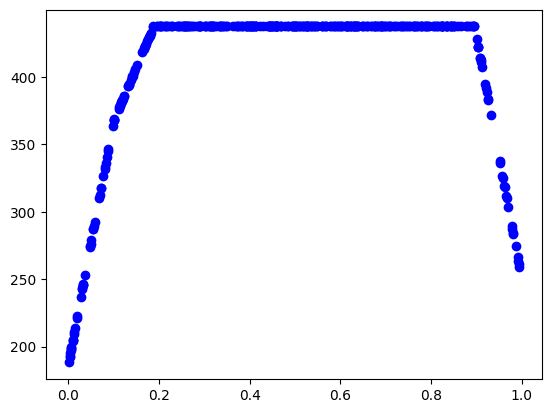

In [91]:
import matplotlib.pyplot as plt
np.random.seed(40)
plt.scatter(np.random.random(400),profit,color='blue')
plt.show()

In [92]:
model9 = ConcreteModel()

In [94]:

model9.x1 = Var(domain = NonNegativeReals)
model9.x2 = Var(domain = NonNegativeReals)
model9.x3 = Var(domain = NonNegativeReals)
# declaring constraints

model9.constr1 = Constraint(expr = 4*model9.x1 + 2*model9.x2 + model9.x3  >= 10)
model9.constr2 = Constraint(expr =  2*model9.x1 + 5*model9.x2 + model9.x3 >= 15)


# declaring objective function
model9.profit = Objective(expr = 80*model9.x1+60*model9.x2+60*model9.x3, sense=minimize)
model9.pprint()

SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model9).write()
# display solution
print('\nprofit = ', model9.profit())
print('\nDecision Variables')
print('x1 = ', model9.x1())
print('x2 = ', model9.x2())

print('\nConstraints')
print('Constraint 1 = ', model9.constr1())
print('Constraint 2 = ', model9.constr2())

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


3 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 80*x1 + 60*x2 + 60*x3

2 Constraint Declarations
    constr1 : Size=1, Index=None, Active=True
        Key  : Lower : Body             : Upper : Active
        None :  10.0 : 4*x1 + 2*x2 + x3 :  +Inf :   True
    constr2 : Size=1, Index=None, Active=True
        Key  : Lower : Body             : Upper : Active
        None :  15.0 : 2*x1 + 5